This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

In [2]:
# construct matrix
mat0 = Hamiltonian(n_min=10, n_max=12, S=None, MJ=0)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 126


In [3]:
# calculate Stark map
Efield = np.linspace(0.0*10**4, 1.5*10**4, 2001)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=0.5, stark_method='dev', zeeman_method='hsfs')

calculate Zeeman terms:   9%|▊         | 11/126 [00:00<00:01, 102.04it/s]

Using field orientation: parallel


calculate Stark terms:   0%|          | 0/126 [00:00<?, ?it/s]

H_Z sum:  -0.000258620855457


diagonalise Hamiltonian:   7%|▋         | 148/2001 [00:00<00:03, 600.84it/s]

mat_s sum:  17599.7179958


diagonalise Hamiltonian: 100%|██████████| 2001/2001 [00:02<00:00, 967.68it/s] 


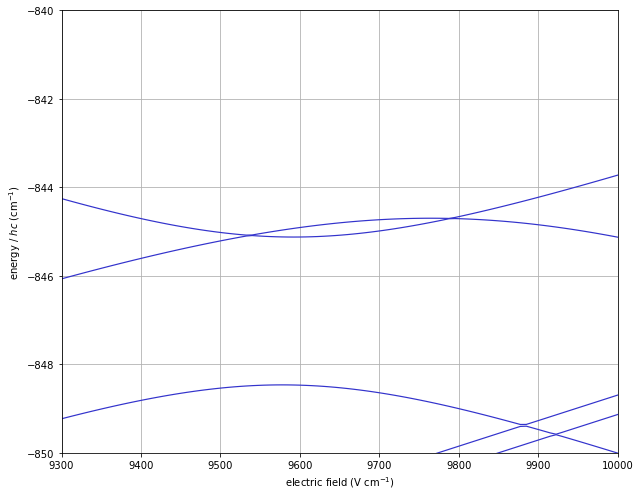

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm0[:, ix] / (h * c), ls='-', lw=1.2, alpha=1, c=(0.2, 0.2, 0.8))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(9300, 10000)
ax.set_ylim(-850, -840)

# output
plt.grid()
plt.tight_layout()

In [5]:
np.sum(mat0._zeeman_matrix)

-243.15714396080446

# Parallel fields, $n=50-51$

In [8]:
# construct matrix
mat0 = Hamiltonian(n_min=50, n_max=51, S=None, MJ=0)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=50, n_max=51, S=None, MJ=0)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 400
Number of basis states: 400


In [11]:
# calculate Stark map
Bfield=0.00
Efield_vec=[0.0,0.0,1.0]
stark_method='dev'
Efield = np.linspace(0.4*10**1, 0.6*10**1, 501)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     singlet_triplet_coupling=0.00000001)

calculate Stark terms:   1%|▏         | 5/400 [00:00<00:10, 37.02it/s]

Using field orientation: parallel


diagonalise Hamiltonian:   2%|▏         | 9/501 [00:00<00:05, 89.35it/s]

mat_s sum:  -22038.4535865


calculate singlet-triplet coupling terms:  10%|█         | 42/400 [00:00<00:00, 404.18it/s]

Using field orientation: parallel
Using Singlet-Triplet coupling


calculate Stark terms:   1%|▏         | 5/400 [00:00<00:09, 43.04it/s]

H_spin sum:  5.04654620077e-05


diagonalise Hamiltonian:   2%|▏         | 9/501 [00:00<00:05, 86.99it/s]

mat_s sum:  -22038.4535865


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:05<00:00, 90.63it/s]


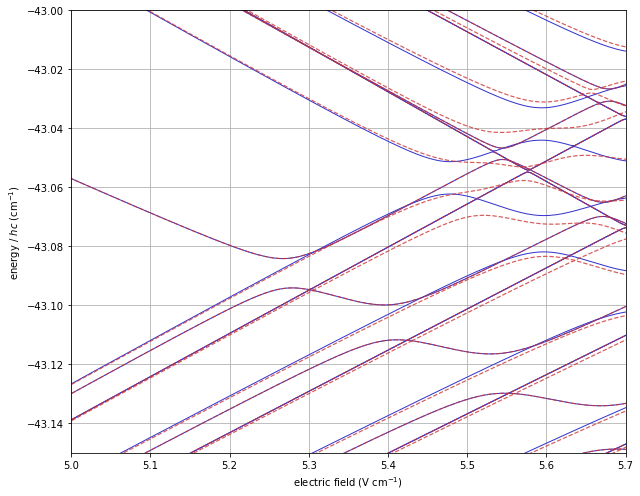

In [12]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm0[:, ix] / (h * c), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat1.num_states)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm1[:, ix] / (h * c), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(5.0, 5.7)
ax.set_ylim(-43.15, -43.00)

# output
plt.grid()
plt.tight_layout()
fileout = os.path.join("../images/stark_n31_singlet_MJ2_MJ29.png")
#plt.savefig(fileout, dpi=150)
#plt.show()

# Parallel fields, $n=5-6$

In [5]:
# construct matrix
mat0 = Hamiltonian(n_min=5, n_max=6, S=None, MJ=0)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=5, n_max=6, S=None, MJ=0)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 40
Number of basis states: 40


In [6]:
# calculate Stark map
Bfield=0.00
Efield_vec=[0.0,0.0,1.0]
stark_method='dev'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     singlet_triplet_coupling=0.00000001)

calculate Stark terms:  15%|█▌        | 6/40 [00:00<00:00, 42.37it/s]

Using field orientation: parallel


calculate Stark terms:   0%|          | 0/40 [00:00<?, ?it/s]

mat_s sum:  -259.128694835
Using field orientation: parallel
Using Singlet-Triplet coupling
H_spin sum:  5.26769890762e-07


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:00<00:00, 4887.33it/s]

mat_s sum:  -259.128694835


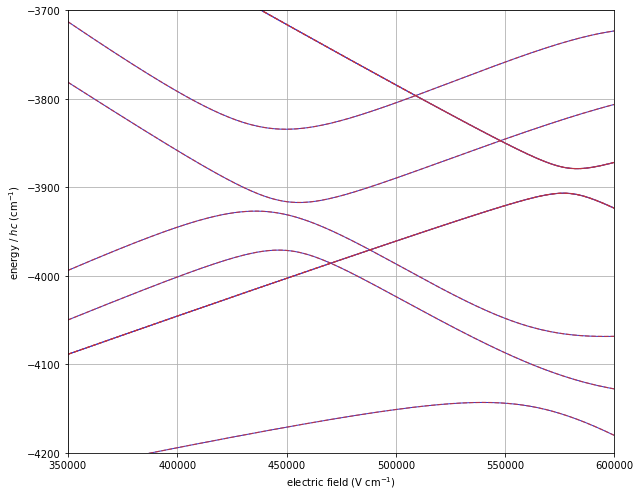

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm0[:, ix] / (h * c), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat1.num_states)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm1[:, ix] / (h * c), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(350000, 600000)
ax.set_ylim(-4200, -3700)

# output
plt.grid()
plt.tight_layout()
fileout = os.path.join("../images/stark_n31_singlet_MJ2_MJ29.png")
#plt.savefig(fileout, dpi=150)
#plt.show()

# Crossed fields, $n=10-11$

In [9]:
# construct matrix
mat0 = Hamiltonian(n_min=5, n_max=6, S=1, MJ=None)
print('Number of basis states:', '%d'%mat0.num_states)
#mat1 = Hamiltonian(n_min=5, n_max=6, S=0, MJ=None)
#print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 183


In [10]:
# calculate Stark map
Bfield=0.0
Efield_vec=[1.0,0.0,0.0]
stark_method='dev'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, stark_method=stark_method)
#sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
#                     Efield_vec=Efield_vec, stark_method=stark_method)

calculate Stark terms:   4%|▍         | 8/183 [00:00<00:02, 78.04it/s]

Using field orientation: perpendicular


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:00<00:00, 1492.98it/s]


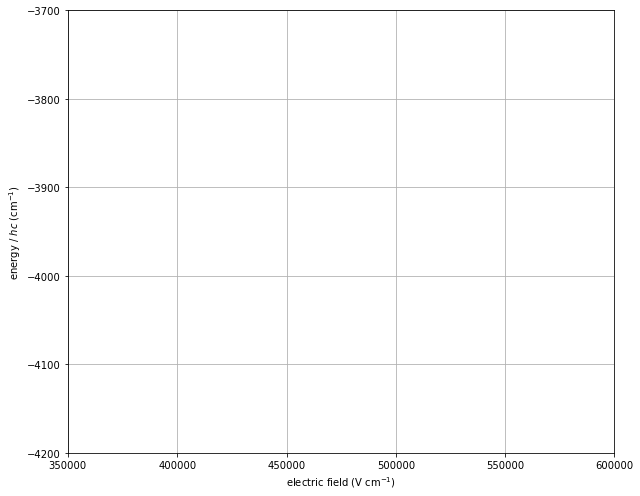

In [11]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm0[:, ix] / (h * c), ls='-', lw=1.2, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#indexes = range(mat1.num_states)
#for ix in indexes:
#    ax.plot(Efield, 1e-2*sm1[:, ix] / (h * c), ls='--', lw=1., alpha=1, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(3.5*10**5, 6.0*10**5)
ax.set_ylim(-4200, -3700)

# output
plt.grid()
plt.tight_layout()
fileout = os.path.join("../images/stark_n31_singlet_MJ2_MJ29.png")
#plt.savefig(fileout, dpi=150)
#plt.show()

In [9]:
constants_info()

,Constant,Value
0,"speed of light in vacuum, $c$",299792458
1,"Planks constant, $h$",6.62607004e-34
2,"Reduced Planks constant, $\hbar$",1.0545718e-34
3,"Rydberg constant, $R_{\infty}$",10973731.568508
4,"electron charge, $e$",1.6021766208e-19
5,fine structure constant,0.0072973525664
6,"permeability of free space, $\mu_B$",1.66053904e-27
7,Hatree energy,4.3597446510117e-18
8,"Bohr radius, $a_0$",5.2917721048e-11
9,"Bohr magneton, $\mu_B$",9.2740099908307e-24
